In [60]:
#pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
cities[:5]
#df = pd.read_html

['busselton', 'ushuaia', 'culebra', 'hermanus', 'dafeng']

In [64]:
#import csv
#f = open("create.csv", "w")
#c = csv.writer(f)
#c.writeline("city", "lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed", "country", "date")




#new_cities = []
#cloudiness = []
#country = []
#date = []
#humidity = []
#temp = []
#lat = []
#lng = []
#wind = []





#url = "http://api.openweathermap.org/data/2.5/weather?"
#i = 0
#for city in cities:
    #if i>49: break
 #   i +=1
    #query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial" #+ "&mode=html"
    #weather_response = requests.get(query_url)
    #weather_json = weather_response.json()
    #print(pd.read_json(weather_response.text).head())
    #c.writeline()
    #print(i, weather_json["id"], weather_json["name"])
    #time.sleep(1)
    
    #try:
        #cloudiness.append(weather_json['clouds']['all'])
        #country.append(weather_json['sys']['country'])
        #date.append(weather_json['dt'])
        #humidity.append(weather_json['main']['humidity'])
        #temp.append(weather_json['main']['temp_max'])
        #lat.append(weather_json['coord']['lat'])
        #lng.append(weather_json['coord']['lon'])
        #wind.append(weather_json['wind']['speed'])
        #new_cities.append(city)
        #print(i, weather_json["id"], weather_json["name"])
    #except:
        #print(city, weather_json)
        #pass

#print('-------------------------')
#print('Data Retrieval Complete')
#print('-------------------------')

        
#time.sleep(1)

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city

#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
#cities_dictionary = {"City":new_cities, "Lat": lat, "Lng": lng, "Max Temp": temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind, "Country": country, "Date": date}



#cities_df = pd.DataFrame(cities_dictionary)
#cities_df.to_csv("cities.csv", index=False)




In [4]:
cities_df = pd.read_csv("cities.csv")
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kem,64.9555,34.5793,41.67,81,100,9.89,RU,1652230045
1,khatanga,71.9667,102.5000,21.16,91,16,11.81,RU,1652230047
2,zeya,53.7500,127.2667,48.99,37,100,3.56,RU,1652230049
3,casablanca,33.5928,-7.6192,62.82,62,67,5.48,MA,1652230051
4,castro,-24.7911,-50.0119,59.40,89,100,1.90,BR,1652230053
...,...,...,...,...,...,...,...,...,...
531,la paz,-16.5000,-68.1500,45.05,66,89,4.85,BO,1652230804
532,north bend,43.4065,-124.2243,57.24,85,4,10.98,US,1652230824
533,isangel,-19.5500,169.2667,79.16,63,8,16.75,VU,1652230909
534,sorkjosen,69.8000,20.9333,33.80,100,100,2.30,NO,1652230910


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
(cities_df["Humidity"] > 100).any()

False

In [6]:
#  Get the indices of cities that have humidity over 100%.
new_cities_df= cities_df[cities_df["Humidity"] <= 100]
new_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kem,64.9555,34.5793,41.67,81,100,9.89,RU,1652230045
1,khatanga,71.9667,102.5000,21.16,91,16,11.81,RU,1652230047
2,zeya,53.7500,127.2667,48.99,37,100,3.56,RU,1652230049
3,casablanca,33.5928,-7.6192,62.82,62,67,5.48,MA,1652230051
4,castro,-24.7911,-50.0119,59.40,89,100,1.90,BR,1652230053
...,...,...,...,...,...,...,...,...,...
531,la paz,-16.5000,-68.1500,45.05,66,89,4.85,BO,1652230804
532,north bend,43.4065,-124.2243,57.24,85,4,10.98,US,1652230824
533,isangel,-19.5500,169.2667,79.16,63,8,16.75,VU,1652230909
534,sorkjosen,69.8000,20.9333,33.80,100,100,2.30,NO,1652230910


In [69]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

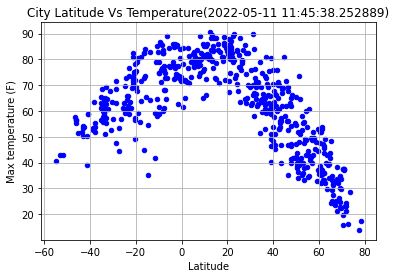

In [9]:
import datetime as dt
cities_df.plot(kind='scatter', x='Lat', y='Max Temp', c='Blue')
plt.title('City Latitude Vs Temperature({})'.format(dt.datetime.now()))#.format(date) 
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")
plt.show()


## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

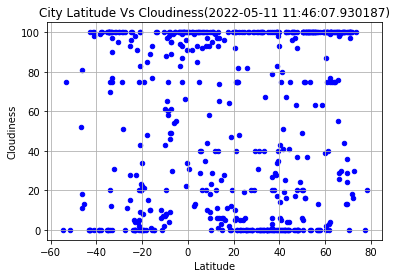

In [10]:
cities_df.plot(kind='scatter', x='Lat', y='Cloudiness', c='Blue')
plt.title('City Latitude Vs Cloudiness({})'.format(dt.datetime.now()))#.format(date) 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

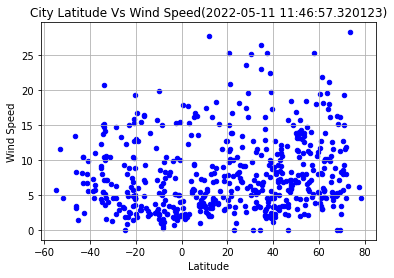

In [11]:
cities_df.plot(kind='scatter', x='Lat', y='Wind Speed', c='Blue')
plt.title('City Latitude Vs Wind Speed({})'.format(dt.datetime.now()))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")
plt.show()

## Linear Regression

In [18]:

northern_hemisphere = cities_df[cities_df['Lat']>0]
southern_hemisphere = cities_df[cities_df['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

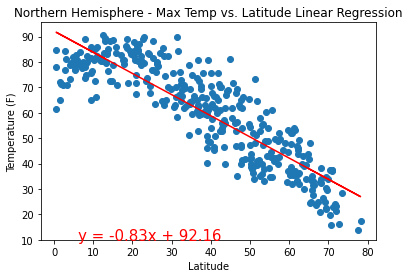

In [36]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

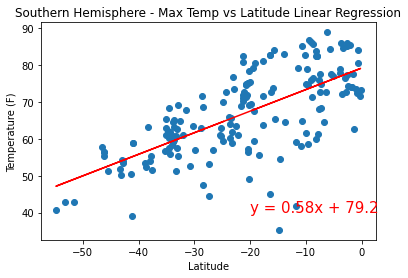

In [53]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

In [ ]:
# There seems to be an inverse relationship between the northern hemisphere and southern hemisphere in the max temp vs latitude linear regression. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

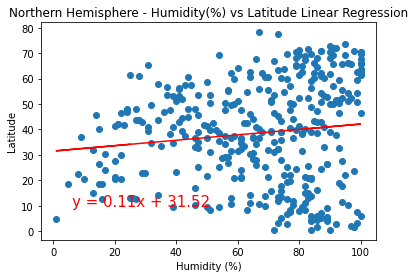

In [31]:
x_values = northern_hemisphere["Humidity"]
y_values = northern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs Latitude Linear Regression")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

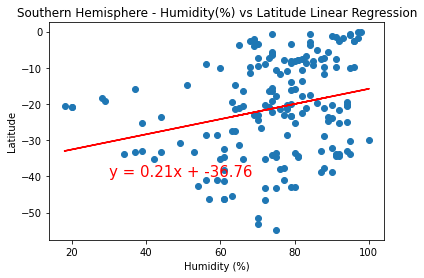

In [54]:
x_values = southern_hemisphere["Humidity"]
y_values = southern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs Latitude Linear Regression")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# The two graphs for humidity vs latitude linear regression are very similar as the both have a similar positive slope. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

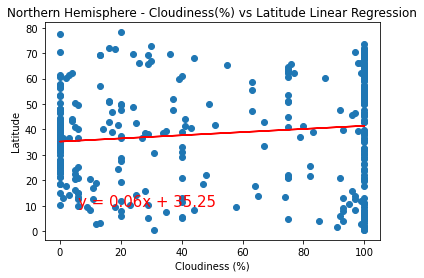

In [33]:
x_values = northern_hemisphere["Cloudiness"]
y_values = northern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs Latitude Linear Regression")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

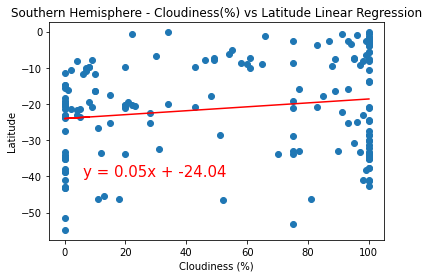

In [43]:
x_values = southern_hemisphere["Cloudiness"]
y_values = southern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs Latitude Linear Regression")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Regardless of hemisphere, both cloudiness vs latitude linear regression's appear to be extremely similar as they both have a similar positive slope value. The only difference is with the intercepts. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

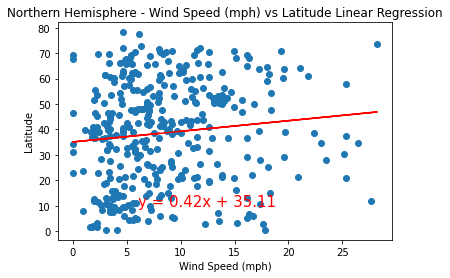

In [56]:
x_values = northern_hemisphere["Wind Speed"]
y_values = northern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

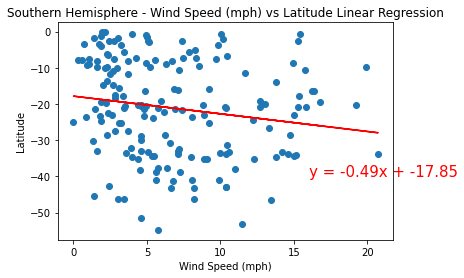

In [60]:
x_values = southern_hemisphere["Wind Speed"]
y_values = southern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,-40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# The linear regression for the northen hemisphere has a positive slope whereas the regression for the southern hemisphere has a negative slope. The variance of datapoints from the line of regression appear to be similar. 